# Math and NumPy Fundamentals

To fully understand deep learning, you need to know some linear algebra and calculus.<br>
We'll cover the basics in this lesson, including how to use NumPy to apply the math using Python.<br>
This will give you a foundation for the rest of this course.

> Math terminology can be intimidating, but don't worry - everything will be explained using code, diagrams, and plain English.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Vectors

At a very basic level, linear algebra is about manipulating vectors.  This manipulation happens by combining and scaling vectors.<br>

> A vector is a one-dimensional array of numbers. 

Here's an example of a vector:

$$v = [1,1]$$

We can create this vector using NumPy, a Python library for working with arrays.<br>
We'll use NumPy to create and manipulate vectors and matrices:

In [2]:
# Create the above vector as a numpy array
v = np.array([1,1])
print(v)

[1 1]


As you can see, our vector has two elements, `1` and `1`.  We call this one-dimensional since it only has elements in one direction.<br>

> A matrix is a table of data with rows and columns. We can think of a vector as a single row or a single column from a matrix.

Here's an example of a two-dimensional array, also called a matrix:

In [3]:
# Create a matrix as a numpy array
m = np.array([[1,1],[1,0]])
print(m)

[[1 1]
 [1 0]]


We'll discuss matrices more later, but for now, let's keep talking about vectors.<br>
We can graph our vector to understand it better. By convention, we always draw vectors starting at the origin $(0,0)$.<br>
Here's a diagram of our vector `v`:

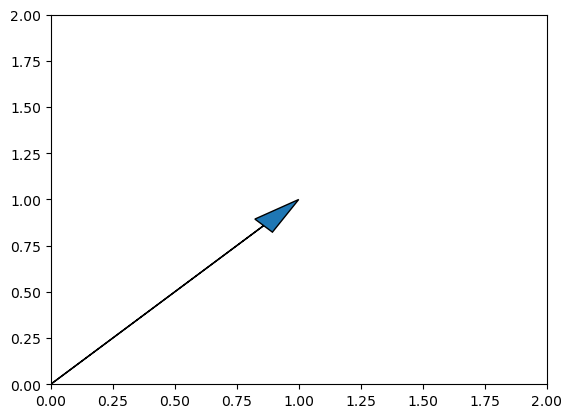

In [4]:
plt.xlim(0, 2)  # set x-axis limits
plt.ylim(0, 2)  # set y-axis limits

# Plot the arrow from (0,0) to (1,1)
plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.2, length_includes_head=True);

As you can see, we draw a line from the coordinate $(0,0)$ to the coordinate $(1,1)$. The vector specifies the end of the line.<br>
The first element in the vector is the $x$-coordinate of the end of the line, and the second element is the $y$-coordinate.<br>
We draw the vector with an arrow to indicate the direction of the vector. In our case, the vector is pointing up and to the right.

> The length of the vector, also called the *norm*, is the distance from the origin to the end of the line.  We can calculate the norm of a vector using this formula:
> $$||x||_{2} = \sqrt{x_{1}^{2} + x_{2}^{2} + \cdots + x_{n}^{2}}$$

This is called the *L2 norm*. It is the most common norm in deep learning.<br>
We can calculate the L2 norm of our vector using NumPy:

In [5]:
np.sqrt(np.sum(v**2))

1.4142135623730951

We would draw a vector with 3 elements in 3-dimensional space.<br>
Here's an example of a 3-dimensional vector:

In [6]:
# Create a vector as a numpy array
v = np.array([0,1,1])
print(v)

[0 1 1]


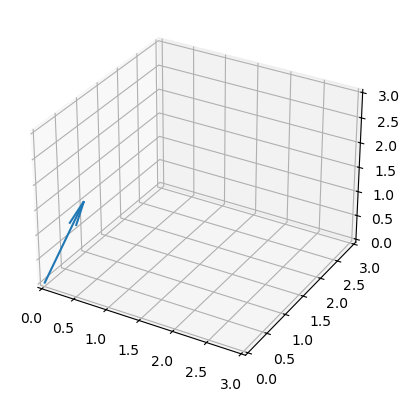

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

# Plot vector
ax.quiver(0,0,0, v[0], v[1], v[2], length=1);

> The number of elements in a vector determines the number of dimensions of the *vector space* this vector exists in.

- A vector with $1$ element exists in a $1$-dimensional space, 
- A vector with $2$ elements exists in a $2$-dimensional space, and 
- A vector with $3$ elements exists in a $3$-dimensional space.

In deep learning, you'll often work with vectors that have thousands of elements - far more than we can visualize or imagine conceptually.<br>
The dimensionality of a vector space is different from the dimensionality of an array.<br>
A vector is a one-dimensional 'column' array, but its amount of row entries can make it exist in a multi-dimensional vector space.

When drawing our plot, you may have noticed that we indexed `v` using the numbers $0$, $1$, and $2$.<br>
In NumPy, we index a vector with a single number (since it is a one-dimensional array).

> In NumPy vectors, the index corresponds to the row position of the element we want.

### Vector Operations

We can scale vectors by scalars (single numbers).<br>
For example, we can multiply our $2$-dimensional vector $v=[1,1]$ by $0.5$ to get $[0.5, 0.5]$:

In [8]:
v = np.array([1,1]) * .5
print(v)

[0.5 0.5]


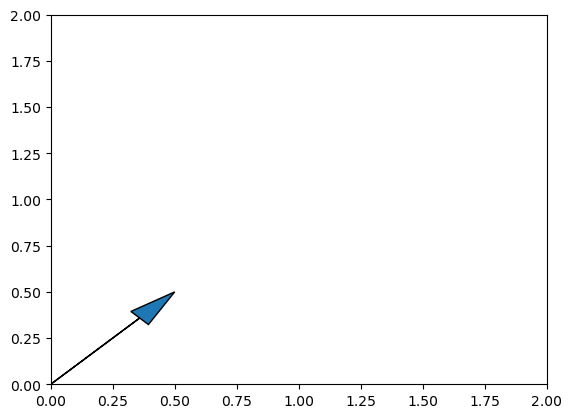

In [9]:
plt.xlim(0, 2)  # set x-axis limits
plt.ylim(0, 2)  # set y-axis limits

# Plot the arrow from (0,0) to (.5,.5)
plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.2, length_includes_head=True);

You can see that the arrow and therefore the vector now ends at $[.5, .5]$.<br>
Beyond scaling, we can also add vectors together. For example, we can add $[1,1]$ and $[1,0]$ to form $[2,1]$:

In [10]:
v = np.array([1,1]) + np.array([1,0])
print(v)

[2 1]


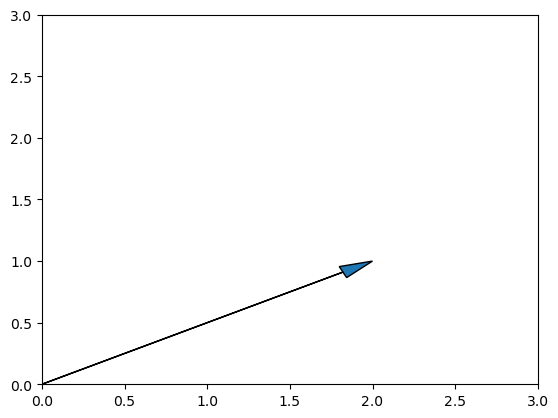

In [11]:
plt.xlim(0, 3)  # set x-axis limits
plt.ylim(0, 3)  # set y-axis limits

# Plot the arrow
plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.2, length_includes_head=True);

This vector now ends at $(2,1)$.

We can use the basis vectors $[0,1]$ and $[1,0]$ along with our operations (multiply by a scalar and add vectors)<br>
to create *any* vector in the 2D Euclidean space that we normally use in graphs.

Here's a plot of the basis vectors:

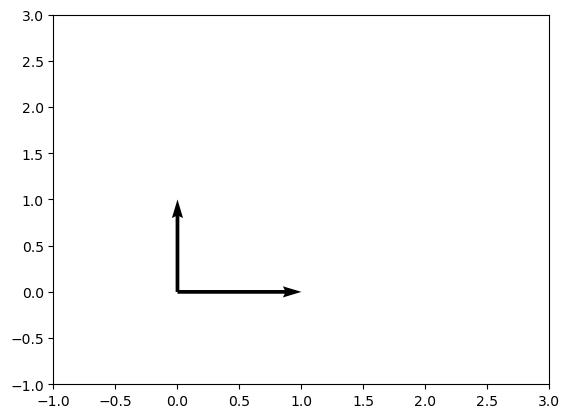

In [12]:
v1 = np.array([1,0])
v2 = np.array([0,1])

plt.xlim(-1, 3)  # set x-axis limits
plt.ylim(-1, 3)  # set y-axis limits

# Plot the arrows with plt.quiver
plt.quiver([0,0], [0,0], [v1[0],v2[0]], [v1[1],v2[1]], angles='xy', scale_units='xy', scale=1);

If we wanted to "reach" the point $(.3,1)$, we would do the following operations:

1. Multiply $[1,0]$ by $.3$ to get $[.3,0]$
2. Add $[.3,0]$ to $[0,1]$ to get $[.3,1]$.

> We call the set of vectors that can be "reached" from a given set of vectors the *span* of the vectors.

In our current case, the span of $[0,1]$ and $[1,0]$ is the entire $2$-dimensional Euclidean space.<br>
One additional property that is important is that $[0,1]$ and $[1,0]$ are *orthogonal* to each other.<br>
This means that they don't have any overlap in the directions that they point.  

We can check this using NumPy:

In [13]:
# Find the dot product of v1 and v2
np.dot(v1, v2)

0

> The dot product tells you how much the direction of one vector overlaps with the direction of another vector.

Since the dot product is $0$, we know that the vectors are orthogonal.

### Basis Change

We express coordinates in terms of a basis.<br> 
We know that the canonical basis vectors for the $2$-dimensional Euclidean space are $[0,1]$ and $[1,0]$.<br>
A coordinate specifies how much we multiply each canonical basis vector to get the vector we want.<br>
For example, the coordinate $(2,1)$ specifies that we multiply $[1,0]$ by $2$ and $[0,1]$ by $1$ to get<br>
$[2,0]$ and $[0,1]$, which we then add together to get $[2,1]$.

> We call what we just did a *linear combination* of the basis vectors.

In deep learning, we often change the basis that we use to express coordinates.<br>
For example, we might want to express the coordinates $(2,1)$ in terms of the basis vectors $[1,1]$ and $[1,-1]$.<br>
Showing you how to do a basis change is outside the scope of this lesson, but it's important to know that it's possible.

## Matrices

We can arrange vectors into matrices. 

> A matrix is a two-dimensional array of numbers.

By convention, we use lower-case letters to represent vectors, and upper-case letters to represent matrices.

Here's an example of a $2\times 2$ matrix:

In [14]:
# Create a matrix as a numpy array
M = np.array([[0,1,2], [1,0,2], [2,1,0]])
print(M)

[[0 1 2]
 [1 0 2]
 [2 1 0]]


A matrix has a certain number of rows and columns.<br>
We can find the number of rows and columns in a matrix using the `shape` attribute:

In [15]:
M.shape

(3, 3)

To index a matrix, we need $2$ numbers instead of $1$.<br>
The first number is the row index, and the second number is the column index.

For example, we can get the element at the first row and first column of `M` like this:

In [16]:
M[0,0]

0

We can also get entire rows and columns at once, or slices of them:

In [17]:
print(M)         # Show the entire matrix
print()
print(M[0])      # Select the entire first row
print()
print(M[:,0])    # Select the entire first column
print()
print(M[:2, :2]) # Select elements in the upper left corner

[[0 1 2]
 [1 0 2]
 [2 1 0]]

[0 1 2]

[0 1 2]

[[0 1]
 [1 0]]


We can also use indexing for assignment:

In [18]:
# Set the first element to 10
M[0,0] = 10

In deep learning, you will often work with **arrays that are $3$ or more dimensions**.<br>
To index these, you'll need to **use as many index numbers as there are dimensions**.

## Linear Regression

Now that we understand a bit about vectors, matrices and how to use them, let's look at a concrete example.

We'll use linear regression to predict tomorrow's temperature.<br>
We do this with the equation $\hat{y} = wx + b$, where:

- $\hat{y}$ is the prediction,
- $w$ is the weight,
- $x$ is the input, and
- $b$ is the bias.

We can first read in our data using `pandas`:

In [19]:
# Read in the data
data = pd.read_csv("../data/clean_weather.csv", index_col=0)
# Forward Fill: Fill missing values with respective past values, column-wise
data = data.ffill()

# Show the first 5 rows of the data
data.head(5)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In the table above,

- `tmax` is today's max temperature, 
- `tmin` is today's min temperature
- `rain` is how much it rained today, and  
- `tmax_tomorrow` is tomorrow's temperature.

> We're going to use `tmax`, `tmin`, and `rain` to predict `tmax_tomorrow`.

Because we have more than one input variable, we can extend our equation to multiple predictors $x_n$ like so:

$$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + b$$

To get a prediction on tomorrow's temperature $\hat{y}$, we can take a value called $w_{1}$<br>
and multiply it by `tmax`, then take $w_{2}$ and multiply it by `tmin`, then take $w_{3}$ and multiply<br>
it by `rain`. We'd then add our bias $b$. 

Here's how that could look:

In [20]:
# Some examplatory data
.7 * 60 + .3 * 35 + .1 * 0 + 10

62.5

The $62.5$ could be our prediction for `tmax_tomorrow` of the first row of the data, if our weights $w$ are $.7$, $.3$, and $.1$, and our bias $b$ is $10$.<br>
We'll discuss how you can calculate the correct $w$ and $b$ values later, but for now, let's just use these examplatory values.

Whenever we want to make a new prediction, **we apply the same equation**:

In [21]:
# Variables as before, but separated
w1 = .7
w2 = .3
w3 = .1
b = 10

# New row of data, same parameters
w1 * 52 + w2 * 39 + w3 * 0 + b

58.099999999999994

### Vector multiplication

You may notice from the formal setup that we're actually multiplying two vectors, then adding the results together.<br>
We can think of $w$ and $x$ as two vectors that we're multiplying. We multiply each element in $x$ by the corresponding element in $w$.<br>
We then add up all the results. 

> This is called a *dot product*.

Here's an example of the above calculation utilizing the dot product:

In [22]:
w = np.array([.7, .3, .1])
x = np.array([52, 39, 0])

# Multiply w and x elementwise, finally, add bias
np.dot(w, x) + b

58.099999999999994

### Matrix Multiplication

What if we want to make predictions for multiple data rows / multiple vectors $x$ at once?<br>
It would be annoying to have to do the dot product for each row. Luckily, we can use linear algebra to help us out.<br>
We first need to convert our data $x$ and our weights $w$ to a matrix. We can then perform a matrix multiplication to get our predictions, at once, for all rows $x$.

Matrix multiplication is a linear algebra operation defined like this:

$$
\begin{equation}
    A \times B =
    \begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22}
    \end{bmatrix}
    \times
    \begin{bmatrix}
    b_{11} \\
    b_{21}
    \end{bmatrix}
    =
    \begin{bmatrix}
      a_{11}b_{11} + a_{12}b_{21} \\
      a_{21}b_{11} + a_{22}b_{21}
    \end{bmatrix}
\end{equation}
$$

We can visualize how it works with this gif:<br>

<div style="text-align:center;">
    <img src="../images/linalg/matrix_mult.gif" alt="Matrix Multiplication">
</div>

As you can see, we essentially take each row of matrix $A$ and multiply it by each column of matrix $B$, then add everything together.<br>

> The number of columns in the first matrix has to equal the number of rows in the second matrix.

This is very useful to us when we're multiplying weights by input numbers.<br>
We can take our $x$ values, put them into a matrix, then multiply by the weights (also in a matrix):

In [23]:
# Convert the first 3 rows of input data into a numpy matrix from our pandas dataframe
# Shape should become (3, [tmax, tmin, rain])

X = data[["tmax", "tmin", "rain"]].iloc[:3].to_numpy()
X

array([[60., 35.,  0.],
       [52., 39.,  0.],
       [52., 35.,  0.]])

We can verify the shape of our matrices to make sure they can be multiplied:

In [24]:
# Shape in X, (3, [tmax, tmin, rain])
X.shape

(3, 3)

In [25]:
# Shape of w, (3,) row vector
w.shape

(3,)

As we can see, `x` is a matrix with $3$ rows and $3$ columns.<br>
`w` is actually a row vector with $3$ columns only.

`x` has length $3$ in both dimension $0$ (rows) and $1$ (columns).<br>
`w` has length $3$ in dimension $1$ (columns) only.

If you remember from above, we can multiply `x` and `w` only if the amount of columns of `x`<br>
is the same as the amount of rows of `w`. This isn't the case yet.<br>

We will need to convert `w` from a row vector of $3$ columns into a column vector of $3$ rows.<br>
To do that, we can use the numpy `reshape` method.

We pass in our desired shape for each dimension:

In [26]:
# Reshape w into a 3 by 1 matrix
# The new dimensions must match the number of elements in w
W = w.reshape(3,1)
W

array([[0.7],
       [0.3],
       [0.1]])

In [27]:
W.shape

(3, 1)

We now have a $3\times 3$ matrix, and a $3\times 1$ matrix.<br>
Since now the number of columns in `x` matches the number of rows in `w`, we can multiply:

In [28]:
X @ W # @ is the matrix multiplication operator in NumPy

array([[52.5],
       [48.1],
       [46.9]])

We can now add in our bias value $b$ as `10`. $b$ remains just a scalar.<br>
When we add it to the result of `X @ W`, it will be broadcast across the entries of the matrix (added to each element):

In [29]:
b = np.array([10])
X @ W + b

array([[62.5],
       [58.1],
       [56.9]])

This gives us the same results as when we manually multiplied our `w` and `x` values for three seperate data entries.<br>
This is the power of matrix multiplication - it enables us to store all of our parameters (`w` and `b` values) into arrays and then use them to modify our inputs.<br>
This is **a lot faster** than keeping track of each individual variable!

## The Normal Equation

Earlier, we used arbitrary values for $w$ and $b$.<br>
However, we can also calculate the correct values $w$ and $b$ by using the *normal equation*.

> The normal equation gives us the exact solution for $w$ and $b$ that minimizes the error of our model mapping $x$ to $y$.

It's defined like this:
$$W = (X^T X)^{-1} X^T Y$$

This equation determines the set of coefficients $W$ that project the coordinates $Y$ onto the basis $X$.<br>
Another way to say this (it's a complicated concept!) is that we're changing the basis vectors of $Y$ to the vectors in $X$.<br>
The coefficients $W$ find a way to do this through minimizing error.

We won't go into more detail on this here, but I recommend reading [this book](https://mml-book.github.io/) for more detail.

### Matrix Transposition

You may have noticed a term in the above equation:
$$X^T$$
This is called *matrix transposition*.<br>
Matrix transposition is a way to switch the rows and columns of a matrix.<br>
For example, we can transpose our weights and $X$ values:

In [30]:
# Use .T to get the transpose of a matrix
print(X @ W + b, '\n') # Old
print(W.T @ X.T + b)   # New

[[62.5]
 [58.1]
 [56.9]] 

[[62.5 58.1 56.9]]


Transposition takes the $3\times 1$ weight matrix, and turns it into a $1\times 3$ matrix.<br>
It then transposes the $3\times 3$ matrix $x$.

<div style="text-align:center;">
    <img src="../images/linalg/matrix_transpose.gif" alt="Matrix Transpose">
</div>

The dimensions of $x$ are just switched for rows and columns:

In [31]:
print(W, '\n')
print(W.T)

[[0.7]
 [0.3]
 [0.1]] 

[[0.7 0.3 0.1]]


In [32]:
print(X, '\n')
print(X.T)

[[60. 35.  0.]
 [52. 39.  0.]
 [52. 35.  0.]] 

[[60. 52. 52.]
 [35. 39. 35.]
 [ 0.  0.  0.]]


`W.T @ X.T` will multiply each column in the weight matrix by each row in matrix $x$.<br>
This is the exact same thing that will happen when we do `X @ W`.<br>
It's just that `W.T @ X.T` returns a $1\times 3$ matrix, and `X @ W` returns a $3\times 1$ matrix.<br>

If we therefore want `W.T @ X.T` and `X @ W` to be of the same shape,<br>
we need to perform another transposition around either one of them:

In [33]:
# np.allclose() tells us if two matrices are approximately equal
print(np.allclose((W.T @ X.T), X @ W))   # Without outer transpose -> False
print(np.allclose((W.T @ X.T).T, X @ W)) # With outer transpose    -> True

False
True


When comparing the results of matrix multiplication we usually use `np.allclose` instead of `==` because<br>
the way computers perform floating point arithmetic can cause the same number to appear slightly differently.

You can see a deeper explanation for this behavior [here](https://floating-point-gui.de/).

### Matrix Inversion

You may have also noticed the term $(X^T X)^{-1}$ in the normal equation. This is called *matrix inversion*.

The inverse of a matrix is similar to the inverse of a number.<br>
For example, the inverse of `4` is `1/4`, and `4 * 1/4` equals `1`.<br>
$X \cdot X^{-1}$ is equal to the **identity matrix, $I$**.<br>
The identity matrix is a matrix with $1s$ on the diagonal, and $0s$ everywhere else.

Here's the $3\times 3$ identity matrix:

In [34]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

We can invert our $X$ matrix with the help of NumPy:

In [35]:
# Use np.linalg.inv to get the inverse of a matrix
np.linalg.inv(X)

LinAlgError: Singular matrix

Well, seems like we can't.

> If any rows and columns of a matrix are linear combinations of other rows and columns, then the matrix is singular.  
> This means that the matrix cannot be inverted.  

Here's an example:

In [36]:
# This matrix is singular
np.array([[1, 2], [2, 4]])

# This matrix is not singular
np.array([[1, 2], [3, 7]])

array([[1, 2],
       [3, 7]])

The reason for this is when a matrix is singular, the area of the matrix, the so called determinant, is $0$.<br>
For a $2\times 2$ matrix, the determinant is calculated like this:
$$det(\begin{bmatrix}a & b\\ c & d\end{bmatrix}) = ad - bc$$

> If $det(A) = 0$, then $A^{-1}$ does not exist.

The formula for the inverse uses $\frac{1}{det(A)}$ as a term, which is undefined if $A$ is singular.

To still go and calculate a singular matrix' inverse, we can add a small "ridge" to the diagonal of the matrix<br>
by scaling the identity matrix. This forces each row and column to be unique (not a linear combination of others).

> This is known as ridge regression.

Let's transfer this to our $X$, which is a $3\times 3$ matrix.<br>
First, we need to know if the determinant of $X$ is $0$ / if $X$ is singular:

$$
\text{det}\left(\begin{matrix} 
60 & 35 & 0 \\
52 & 39 & 0 \\
52 & 35 & 0
\end{matrix}\right)
$$

Let's use the [expansion by minors](https://mathworld.wolfram.com/DeterminantExpansionbyMinors.html) for calculating the determinant:

$$
\text{det}\left(\begin{matrix} 
60 & 35 & 0 \\
52 & 39 & 0 \\
52 & 35 & 0
\end{matrix}\right) 
= 60 \times \text{det}\left(\begin{matrix} 39 & 0 \\ 35 & 0 \end{matrix}\right) - 
35 \times \text{det}\left(\begin{matrix} 52 & 0 \\ 52 & 0 \end{matrix}\right) + 
0 \times \text{det}\left(\begin{matrix} 52 & 39 \\ 52 & 35 \end{matrix}\right)
$$

We know how to calculate the individual determinants from here:

$$\text{det}\left(\begin{matrix} 39 & 0 \\ 35 & 0 \end{matrix}\right) = (39 \times 0) - (35 \times 0) = 0$$
$$\text{det}\left(\begin{matrix} 52 & 0 \\ 52 & 0 \end{matrix}\right) = (52 \times 0) - (52 \times 0) = 0$$
$$\text{det}\left(\begin{matrix} 52 & 39 \\ 52 & 35 \end{matrix}\right) = (52 \times 35) - (52 \times 39) = -208$$

So, the determinant of $X$ is:

$$
\text{det}\left(\begin{matrix} 
60 & 35 & 0 \\
52 & 39 & 0 \\
52 & 35 & 0
\end{matrix}\right) = 60 \times 0 - 35 \times 0 + 0 \times -208 = 0
$$

Since the determinant is zero, the matrix is singular and we can apply ridge regression.<br>
Let's nudge $X$ up along the identity matrix by $0.1$:

In [37]:
# Add a ridge to the diagonal of the matrix
np.linalg.inv(X + 0.1 * np.eye(3))

array([[ 0.07378611, -0.06604895,  0.        ],
       [-0.09812987,  0.11341549,  0.        ],
       [-4.02332472, -5.34996509, 10.        ]])

In [38]:
# This returns the identity matrix (ignore the insanely small negative values)
ridge = X + 0.1 * np.eye(3)
ridge @ np.linalg.inv(ridge)

array([[ 1.00000000e+00, -4.44089210e-16,  0.00000000e+00],
       [-4.44089210e-16,  1.00000000e+00,  0.00000000e+00],
       [-2.77555756e-16, -4.44089210e-16,  1.00000000e+00]])

### Solving The Equation

We can now use the normal equation to solve for $W = (X^T X)^{-1} X^T Y$:

In [39]:
# Load in our Y values from the data
Y = data[["tmax_tomorrow"]].iloc[:3].to_numpy()

# Use the normal equation to solve for W
W = np.linalg.inv(X.T @ X + .1 * np.eye(x.shape[0])) @ X.T @ Y
W

array([[0.38283829],
       [0.86270249],
       [0.        ]])

In [40]:
# Multiply X by W to get our predictions
X @ W

array([[53.16488447],
       [53.55298814],
       [50.10217817]])

In [41]:
# This is what we expected to get
Y

array([[52.],
       [52.],
       [53.]])

As you can see, our predictions are pretty close to the actual values.<br>
We left out $b$ to make the calculation simpler, but you could also use this method<br>
to calculate it (but it's out of scope of this lesson!).

## Broadcasting

A couple of sections back, we used broadcasting to add the bias `b` to the result of `X @ W`.<br>
Broadcasting enables arrays with compatible shapes to be added or multiplied.

If shapes are compatible, it means that:
- The smaller array has all of its dimensions exactly matching the length dimensions of the larger array
- Or the smaller array is length 1 in the non-matching dimensions.

Here are some examples:

In [42]:
# np.ones enables us to create an array filled with ones of a certain shape
A = np.ones((5,1))

# This works
A + np.ones((1,1))

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [43]:
# This works
A + np.ones((1))

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [44]:
# This does not work
A + np.ones((2,1))

ValueError: operands could not be broadcast together with shapes (5,1) (2,1) 

We can also use broadcasting to multiply individual elements:

In [45]:
# np.full initializes an array filled with a given value
# Using the * means that each element in array b is multiplied by the elements in array b
A * np.full((1,1), 2)

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [46]:
# np.random.rand generates random numbers between 0 and 1 of a given shape
A * np.random.rand(5,1)

array([[0.96124559],
       [0.75410811],
       [0.21627948],
       [0.88948469],
       [0.7802951 ]])

## Derivatives

The last math concept we'll cover is derivatives, a key part of calculus.<br>
We'll cover derivatives in *a lot* more depth later, so this will just be a high-level primer.

Derivatives tell us the rate of change of a function at any point across its domain.<br>
For example, the derivative of $x^2$ is $2x$. Let's see how this works, by first plotting out $f(x) = x^2$:

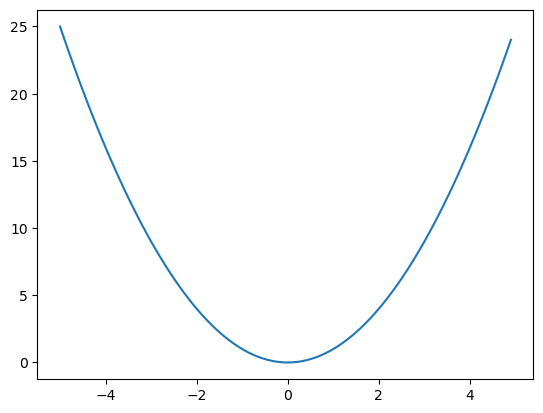

In [47]:
xs = np.arange(-5, 5, .1) # Create a list of numbers from -5 to 5, stepping by .1
ys = xs ** 2  # Square all of our x values

plt.plot(xs, ys);

The function graph has a parabolic shape. This means that if $x$ is positive, $(x+2) ^ 2 - (x+1) ^ 2$ is greater than $(x+1) ^ 2 - x ^ 2$.  If $x$ is negative, $(x-2) ^ 2 - (x-1) ^ 2$ is greater than $(x-1) ^ 2 - x ^ 2$.  The rate of change, i.e. the slope of the function, is increasing as we get further from $0$.

As you can see below, the derivative is the slope between $2$ points on the function curve:

<div style="text-align:center;">
    <img src="../images/linalg/slope.svg" alt="Slope">
</div>

We can calculate the slope with $\frac{y_2 - y_1}{x_2 - x_1}$, where $x_2$ and $x_1$ are<br>
the $x$ values of $2$ points, and $y_2$ and $y_1$ are the $y$ values of the same points.

In [48]:
# Find 2 x points close to 5
x1 = 5 - 1e-8
x2 = 5 + 1e-8

# Calculate the corresponding y values
y1 = x1 ** 2
y2 = x2 ** 2

# Calculate the slope (or derivative)
# This will equal 2 times the midpoint of the x values (5)
(y2 - y1) / (x2 - x1)

10.0

Now, the derivative is generally defined like so:
$$f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$

Geometrically, the derivative represents the slope of the tangent line to the graph of the function at one point.<br>
We approximate this local slope by choosing $(x_1, y_1)$ and $(x_2, y_2)$ to be really close to each other.

For our function, we would say that $f'(5) = 10$.<br>
This means that the rate of change of $x^2$ at $x=5$ is $10$.

We can now plot the derivative for all points through $f'(x) = 2x$:

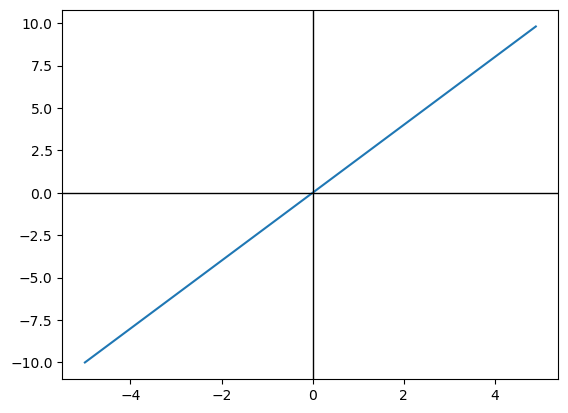

In [49]:
ys = xs * 2

# Plot the derivative
plt.plot(xs, ys)

# Plotting the origin to make things easier to see
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1);

The derivative is an upward-sloping line.<br>
This tells us that the rate of change of the function increases from very negative, to neutral, to very positive as $x$ increases.

Derivatives are *hugely important* for training neural networks.<br>
They allow us to determine the degree of change we should perform on our network parameters during training.<br>
We'll learn more about this in the next lesson.

## Wrap-up

In the next lesson, we'll build on what we learned here to **automatically calculate the correct $w$ and $b$ values** for linear regression using a technique called **gradient descent**.  Gradient descent is a foundational concept of neural networks.<br>
I hope to see you there!